#Introduction to seismology 


* ##<span style="color:orange"> Earthquakes and faulting (& statistics)
    * A recap of faults from the perspective of geology and seismology
* ##<span style="color:blue"> Elastic waves (waveforms & numerical modelling)
    * Obspy for (delayed) data analysis
    * P and S waves (Velocity or displacement)
    * Rays, and why do waves reflect anyway?
* ##<span style="color:green"> Measuring seismic waves and correction
    * How would we isolate the P wave?
* ##<span style="color:red"> Tomography (& inverse theory, exploration)


In [1]:
%pylab inline
#from __future__ import print_function
#plt.style.use('ggplot')
#plt.rcParams['fi|gure.figsize'] = 6, 4

import numpy as np
from mpl_toolkits.basemap import Basemap
import obspy
from obspy.imaging.beachball import beach
import os
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from matplotlib import cm, rcParams

Populating the interactive namespace from numpy and matplotlib


##<span style="color:orange">Earthquakes and faulting

* geological faults provide fairly convincing evidence of the brittle nature of deformation in the earth's lithosphere.

* Seismology has traditionally focussed on measuring an interpreting the elastic waves that sudden slips produce.


<img src="./images/darfield_rupture.jpg " alt="Drawing" style="width: 300px;"/>

In [2]:
client = Client("IRIS")
start = UTCDateTime("2014-09-01T15:10:00")
end= UTCDateTime.now()
cat = client.get_events(starttime=start, endtime=end,latitude=-38.1, longitude=144.00,minradius=0., maxradius=2.)
inv = client.get_stations(longitude=144.00, latitude=-38.1, maxradius=2, level="channel")

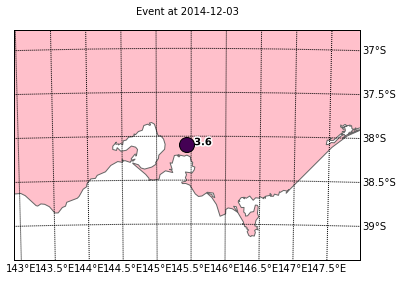

In [3]:
evplot = cat.plot(projection="local", resolution='i', continent_fill_color="pink")

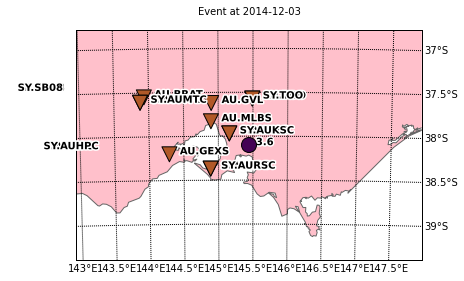

In [4]:
#plot inventory, reusing mpl Figure
inv.plot(fig=evplot)

##<span style="color:orange">Earthquakes and faulting

As in all physics, seismology employs approximations; earthquakes are commonly approximated as infinitesimally localized events in space, i.e. at the hypocenter, which begin at an instant, the origin time.

![Alt text](./images/hypocenter.jpeg)

#Chile quake

* This script reads moment tensor information from the IRIS database: http://ds.iris.edu/spud/momenttensor

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-77.0,-37.0,-67.0,-27.0&bboxSR=4326&imageSR=4326&size=1500,1500&dpi=96&format=png32&f=image


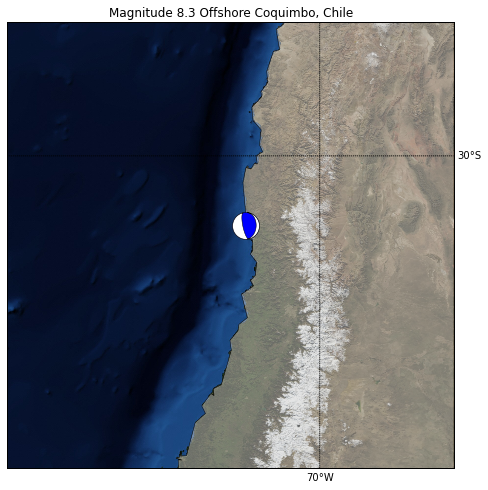

In [6]:
#%pylab inline
fig = %run chile_plot.py
fig;  #silence the display hook with a semicolon, prevent fig displaying twice 


<img src="./images/Chile1709_PacificView.png " alt="Drawing" style="width: 600px;"/>

##<span style="color:orange">Earthquakes and faulting


<img src="./images/focal_mechanism.jpeg " alt="Drawing" style="width: 400px;"/>

##<span style="color:blue"> Elastic waves

* P & S waves
* surface waves
* conversion
* Rays and travel time curves
* Numerical modelling

##<span style="color:blue"> Elastic waves

For small elastic deformations the relation between the deformation and the resulting stress can be linearised; this linearisation is expressed by Hooke’s law:

$$ F = k\triangle x$$

or in 3d:

$$\tau_{ij} = C_{ijkl}\epsilon_{kl}$$



##<span style="color:blue"> Elastic waves

For isotropic model of elasticity, you will find descriptions using different mixtures of parameters. An isotropic stiffness tensor, like $\bf{C}$ may be formulated as a linear combination of other isotropic unit tensors which fulfill the restriction of being linearly independent among them, hence LAME's constants in some descriptions, YOUNG's modulus and POISSON ratio in others...


![Alt text](./images/hookes.jpeg)




##<span style="color:blue"> Elastic waves


* Elastodynamic waves are vector waves, with no restriction on the polarisation. Because there are three spatial dimensions, elastodynamic waves can have three different polarisations. 

* Waves in a bulk solid can be transverse as well as longitudinal, for a total of three polarization components. 

* Longitudinal waves propagate at a higher velocity than do the transverse waves. The nomenclature “P wave” and “S waves” historically denotes the first arriving (primary) and later arriving (secondary) body waves. 

* Shear wave anisotropy is a major constraint on deep mantle flow.

##<span style="color:blue"> Elastic waves

<img src="./images/anisotropy.jpg " alt="Drawing" style="width: 400px;"/>

In [7]:
ev = cat[0]
ot = ev.origins[0]['time']
st = client.get_waveforms("AU", "TOO", "", "*", ot - 0.2 * 60, ot + 1. * 60, attach_response=True)
#st.remove_response(output="VEL")

/Users/dansandiford/Documents/programming/earthsci_code/python/seismic/obspy/obspy/clients/fdsn/client.py:636: UserWarning: Service responds: Internal server error
Detailed response of server:

Error 500: Internal Server ErrorDatabase Unavailable
Request:
http://service.iris.edu/fdsnws/station/1/query?network=AU&level=response&station=TOO&starttime=2014-12-03T19%3A04%3A58.019500&endtime=2014-12-03T19%3A06%3A09.994500&channel=BHE
Request Submitted:
2015/09/30 01:16:08 UTC
Service version:
fdsnws-station: v 1.1.18
  warnings.warn(str(e))
/Users/dansandiford/Documents/programming/earthsci_code/python/seismic/obspy/obspy/core/stream.py:2998: UserWarning: No matching response information found.
  warnings.warn(str(e))


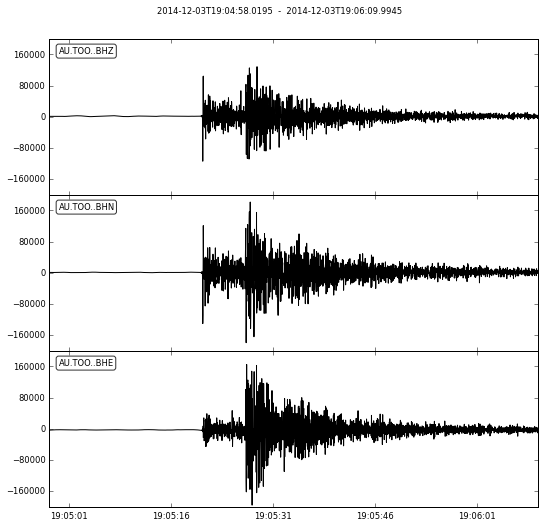

In [8]:
st.plot()

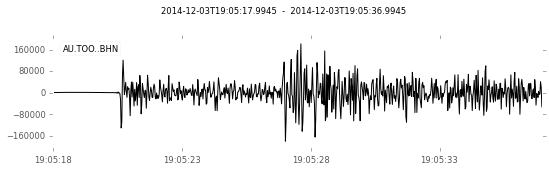

In [10]:
#P and S waves arrivals

st2 = st.copy()
tr = st2[1]
tr.trim(ot+8,ot+27).plot()

##<span style="color:blue"> Elastic waves

Ray theory originally emerged from optics where it was used to understand the propagation of light even before more fundamental equations for light propagation (Maxwell’s equation) were known.

Solving the elastic wave equation requires significant computational effort. Ray theory is an alternative approach in which a point on the wavefront is tracked rather than the complete wavefield. Ray theory is strictly valid for media whose length scale variation of the elastic moduli is much larger than the seismic wavelength (the high frequency assumption). 

From the point of view of modelling, the ray approximation reduced the governing equation from a PDE to ODE. Ray paths and amplitudes are treated seperately.


In [11]:
from IPython.html.widgets import interact
from obspy.taup import TauPyModel

m = TauPyModel("ak135")

def plot_raypaths(distance, depth, wavetype):
    try:
        plt.close()
    except:
        pass
    if wavetype == "all":
        phases = ["ttall"]
    elif wavetype == "diff":
        phases = ["Pdiff", "pPdiff"]
    m.get_ray_paths(distance_in_degree=distance,
                    source_depth_in_km=depth,
                    phase_list=phases).plot();


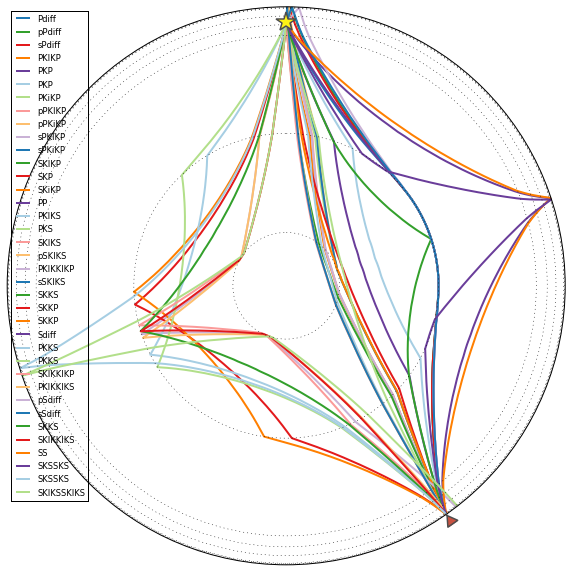

In [12]:
interact(plot_raypaths, distance=[0, 180],
         depth=[0, 700], wavetype=["all", "diff"])

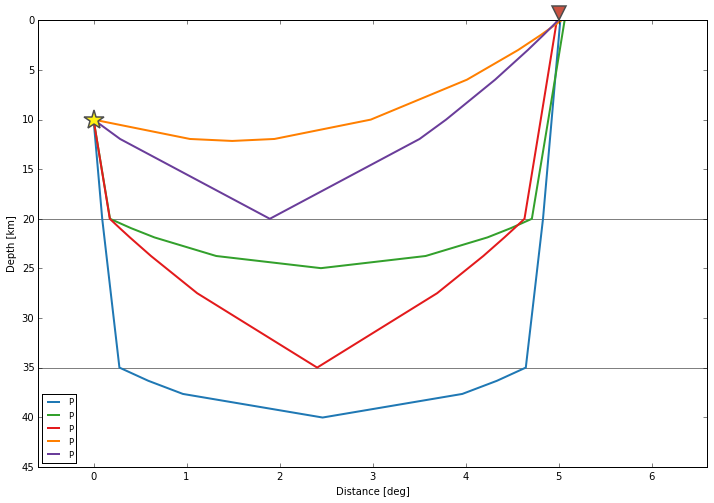

In [13]:
m.get_ray_paths(10, 5, phase_list=["P"]).plot(plot_type="cartesian", plot_all=True)

##<span style="color:blue"> Elastic waves

###Shadow zones

The primary seismic waves are refracted by the liquid outer core of the Earth and are not detected between 104° and 140°

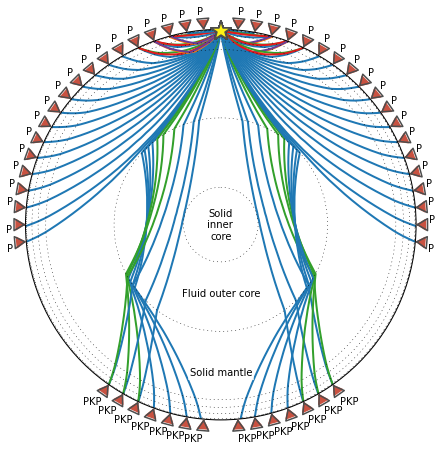

In [17]:
#%pylab inline
fig = %run taupy_shadow_zone.py
fig;  #silence the display hook with a semicolon, prevent fig displaying twice 

/Users/dansandiford/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: ObsPyDeprecationWarning: The travelTimePlot() function is deprecated. Please use the obspy.taup.TauPyModel class directly.


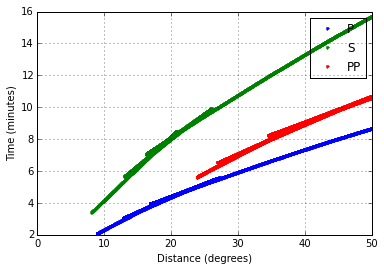

In [18]:
from obspy.taup.taup import travelTimePlot
travelTimePlot(min_degree=0, max_degree=50, phases=['P', 'S', 'PP'],
               depth=120, model='iasp91')

<img src="./images/chile_ttp.png " alt="Drawing" style="width: 400px;"/>

##<span style="color:blue"> Elastic waves

Theory predicts that P -waves hitting an interface at an angle should be partially converted to SV -waves.

##<span style="color:blue"> Elastic waves

###Numerical models of wave propagation

<IPython.core.display.Javascript object>


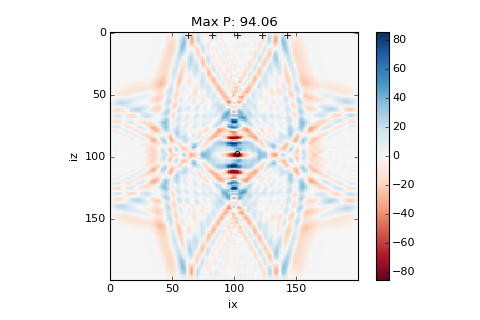

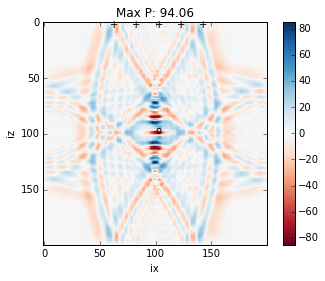

In [24]:
#%pylab inline
fig1 = %run finite_diff.py
fig1;  #silence the display hook with a semicolon, prevent fig displaying twice 

A more sophisticated model...

![Alt text](./images/axisem.png)




In [25]:
from IPython.display import YouTubeVideo
YouTubeVideo("Tx-u_HULFnY")

## <span style="color:green"> Measuring seismic waves and correction

* Seismometers and digitizers (& geophones)
* Instrument correction
* frequency filtering
* rotation


## <span style="color:green"> Measuring seismic waves and correction

###Seismometer and digitizer

Seismographs operate on the principle of resistance to acceleration, of course all mass moved by the seismic wave resists acceleration. 

<img src="./images/seismometer.png " alt="Drawing" style="width: 300px;"/>


## <span style="color:green"> Measuring seismic waves and correction

###Seismometer and digitizer

The motion of the seismometer mass as a function of the ground displacement is given through a differential equation resulting from the equilibrium of forces (in rest).

$$F_{spring} + F_{friction} + F_{gravity} = 0$$

* for slow movements the acceleration and velocity becomes negligible, the seismometer records ground acceleration

* for fast movements the acceleration of the mass dominates and the seismometer records ground displacement

* in general, $u_g \neq x_r$; but instrument correction will restore the true ground motion

## <span style="color:green"> Measuring seismic waves and correction 

### Converting raw seismometer recordings to physical units (aka instrument correction)

For this we need to combine the raw waveform data of the recording system (seismometer, digitizer) with the metadata on its amplitude and phase response (the instrument response)
these information are kept separate for various practical and technical reasons (space in storage and streaming, correcting of errors made in the metadata, ...)

3 Trace(s) in Stream:
AU.TOO..BHE | 2014-12-03T19:04:58.019500Z - 2014-12-03T19:06:09.994500Z | 40.0 Hz, 2880 samples
AU.TOO..BHN | 2014-12-03T19:04:58.019500Z - 2014-12-03T19:06:09.994500Z | 40.0 Hz, 2880 samples
AU.TOO..BHZ | 2014-12-03T19:04:58.019500Z - 2014-12-03T19:06:09.994500Z | 40.0 Hz, 2880 samples


<IPython.core.display.Javascript object>


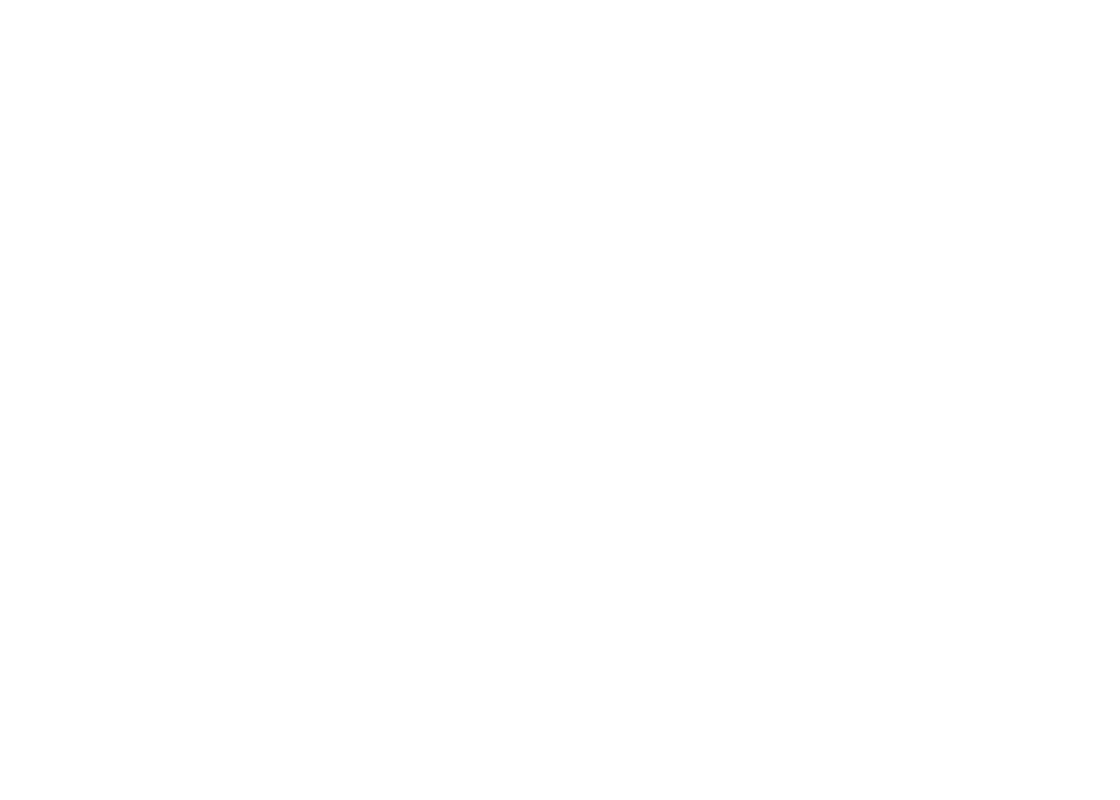

AU.TOO..BHZ | 2014-12-03T19:05:13.994500Z - 2014-12-03T19:05:29.994500Z | 40.0 Hz, 641 samples

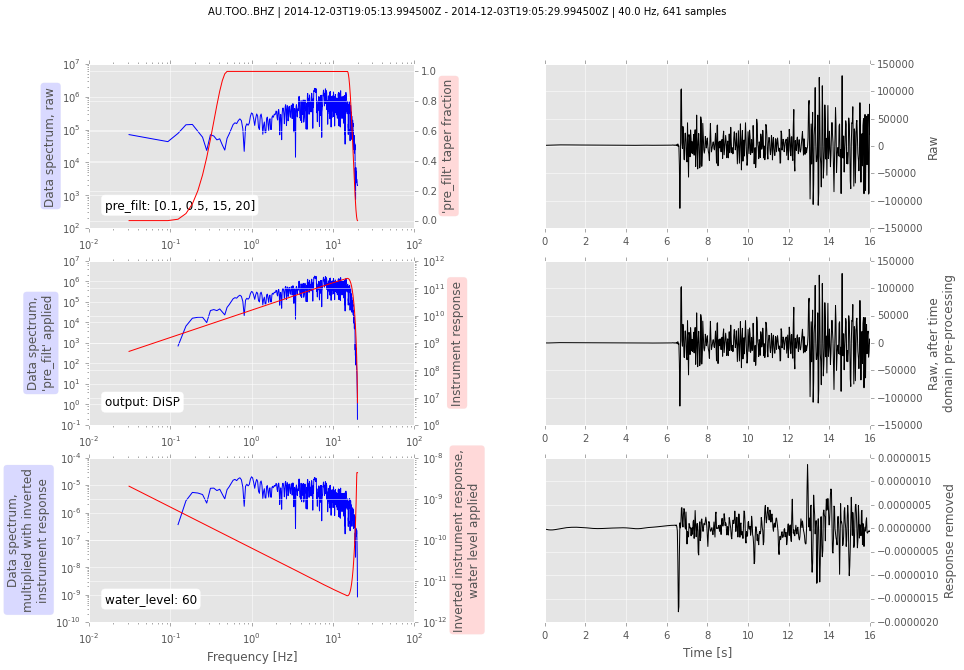

In [17]:
#Stream should still be live in the session
print(st)

from obspy import read, read_inventory

# define a filter band to prevent amplifying noise during the deconvolution
tr = st[2]
tr.trim(ot+4, ot+20)
pre_filt = [0.1, 0.5, 15, 20]
output = "DISP"
tr.remove_response(pre_filt=pre_filt, output=output,
                       water_level=60, plot=True)


##  <span style="color:red"> Tomography (& inverse theory, exploration)

Seismic tomography is an imaging technique that uses seismic waves generated by earthquakes and explosions to create computer-generated, threedimensional images of Earth’s interior. 

Methods include:

* travel time tomography
* ambient nose tomography
* finite frequency / full waveform inversion

##  <span style="color:red"> Tomography (& inverse theory, exploration)

<img src="./images/Tarantola.jpg " alt="Drawing" style="width: 400px;"/>

_"It is my feeling that seismology will one day provide detailed images of the Earth's crust, incommensurable to the gross pictures we obtain today. This will require new technology for data recording and new methods of data interpretation that will, possibly, take a dozen of years to develop. Only then we will understand how predictable earthquakes are."_ Albert Tarantola

In [19]:
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
import wget
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
nc = NetCDFFile('./data/GYPSUMS_kmps.nc')
#at this point you might check whether the file is CF - compliant: http://puma.nerc.ac.uk/cgi-bin/cf-checker.pl
#this file is compliant but the checker suggests adding units to the 'vs' field
#set up data from netCDF-4 file
data = nc.variables['vs'][:]
lats = nc.variables['latitude'][:]
lons = nc.variables['longitude'][:]
lons, lats = np.meshgrid(lons,lats)

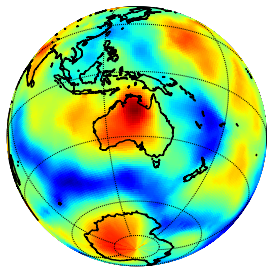

In [23]:
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
m = Basemap(resolution='l',projection='ortho',lat_0=-30.,lon_0=135.)
m.drawmapboundary(fill_color='0.9')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines(linewidth=1.5)
data1 = data[1,:,:] #this dissapears the first dimension
#data1.shape
# plot data1 pcolor
im1 = m.pcolor(lons,lats,data1,cmap=plt.cm.jet,latlon=True)
plt.show()

##  <span style="color:red"> Tomography (& inverse theory, exploration)

In a typical inverse problem, there is:
    
* a set of model parameters ${m_1, m_2, . . . , m_n}$,
* a set of observable parameters ${o_1, o_2, . . . , o_n}$ ,
* a relation $o_i = F(m_1, m_2, . . . , m_n)$ predicting the outcome of the possible observations.


In a least-squares setting, we want to find $\mathbf{m}$ that minimizes

$$\Theta(\mathbf{m}) = ||\mathbf{r}||_2^2 = \mathbf{r}^T\mathbf{r}$$

in which $\mathbf{r} = \mathbf{f(m_n)} - \mathbf{o_n}$ is the residual vector

In [24]:
'''
Problem 1: Estimation of the epicentral coordinates of a seismic event
: http://www.ipgp.jussieu.fr/~tarantola/exercices/chapter_02/Epicenter.pdf
'''
import numpy as np
import matplotlib.pyplot as plt

# data
std_d = 0.10  # standard deviation, being a short notation indicating that experimental uncertainties
#are independent and can be modeled using a Gaussian probability density with a
#standard deviation equal to σ .
v = 5
station = np.array([(3, 15), (3, 16), (4, 15), (4, 16), (5, 15), (5, 16)])
t_obs = np.array([3.12, 3.26, 2.98, 3.12, 2.84, 2.98])

X = np.r_[0:20:201j]
Y = np.linspace(0, 20, 201)

# calculate the posterior distribution
sigma_M = np.zeros((len(X), len(Y)))


Because the model is homogenous, the travel time (Forward model operator) reduces to:
$$\frac{1}{V} \sqrt{(x^i - X)^2 + (y^i - Y) }$$

As data uncertainties are Gaussian and independent, the probability density representing
the information we have on the true values of the arrival times is:

$$P_d(m) = exp \left(-\frac{1}{2}\sum_{i=0}^n \frac{(t_{i,m} - t_{obs})^2}{\sigma^2} \right)$$


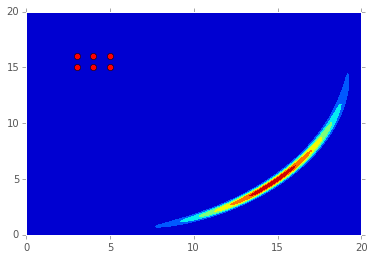

In [25]:


##Note that the variables are not exactly as decribed above

for i in range(X.shape[0]):
    for j in range(Y.shape[0]):
        x = X[i]
        y = Y[j]
        t_cal = np.zeros(t_obs.shape)
        for k in range(t_cal.shape[0]):
            t_cal[k] = ((x - station[k][0])**2 +
                        (y - station[k][1])**2)**0.5 / v
        sigma = 0
        for k in range(t_obs.shape[0]):
            sigma = sigma + (t_cal[k] - t_obs[k])**2
        sigma_M[j, i] = np.exp(sigma/(-2 * std_d**2))
        

plt.contourf(Y, X, sigma_M,)
xx = [station[0][0], station[1][0], station[2][0],
      station[3][0], station[4][0], station[5][0]]
yy = [station[0][1], station[1][1], station[2][1],
      station[3][1], station[4][1], station[5][1]]
plt.plot(xx, yy, 'ro')
plt.show()


##  <span style="color:red"> Tomography (& inverse theory, exploration)

Seismic imaging is somewhat different to tomography, in that the goal is usually to "restore reflectors to their correct subsurface positions". Reflection seismologists make images of the earth's interior. Through the 1960s this
was done in an ad hoc fashion.


<img src="./images/claerbout.jpeg " alt="Drawing" style="width: 200px;"/>

_The main use of reflection seismic imaging is petroleum prospecting. Unlike nuclear energy, hydrocarbons are a nonrenewable resource and there is evidence that petroleum production must decline during the lifetimes of the young generation. Does this mean that young people should avoid these studies? I think not. Taking the long range view, with the population of the earth continuing to increase, it is not easy to imagine people losing interest in the earth's crust._ John Claerbout


##Links to data

- pretty much everything used in this lecture comes from IRIS

http://www.iris.edu/hq/

- University of Melbourne/AGOS data:

http://meiproc.earthsci.unimelb.edu.au/eqserver/

##People and projects areas


* Gary Gibson (Seismic risk and observation seismology)
* Tim Rawling & Dave Belton (observation seismology, seismic risk, data management)
* Mark Quigley (Neptectonics and Paleoseismology)
* Mike Sandiford (seismo tectonics, surface process feedbacks)
* Louis Moresi (geodynamics models, reciever functions, ambient noise tomography)
* Peter Rayner (inverse problems)
* myself (earthquake location, full waveform inversion)

##Links to software

Anaconda python: http://continuum.io/downloads

Obspy: http://docs.obspy.org/

this notebook: https://github.com/dansand/seismic


##Links to software training (e.g. Python)

http://melbourne.resbaz.edu.au/

https://software-carpentry.org/lessons.html

Or, come to HackyHour...Thursdays 3 - 4pm, Tsubu Bar
